# Darshan Padaliya
##### Data Science & Business Analytics Intern at The Spark Foundation

## Task-2 : Prediction using Unsupervised ML

### Predict the optimum number of clusters using K-Means Clustering
In this task we have been give iris dataset and we have to predict iris flower species with K-Means Clustering. The iris dataset has six Columns, one contains the id, four contains the features like sepal length,sepal width, petal length and petal width in centimetres and last column contains the label of iris flower species.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data distribution

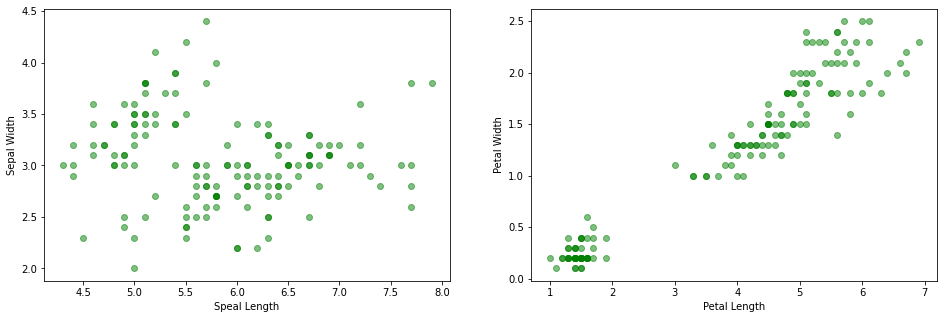

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))


axes[0].plot(df.iloc[:,0], df.iloc[:,1], 'go', alpha=0.5)
axes[0].set_xlabel('Speal Length')
axes[0].set_ylabel('Sepal Width')


axes[1].plot(df.iloc[:,2], df.iloc[:,3], 'go', alpha=0.5)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')
plt.show()

## Defining the optimal number of cluster

Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification

Text(0.5, 1.0, 'Elbow Method')

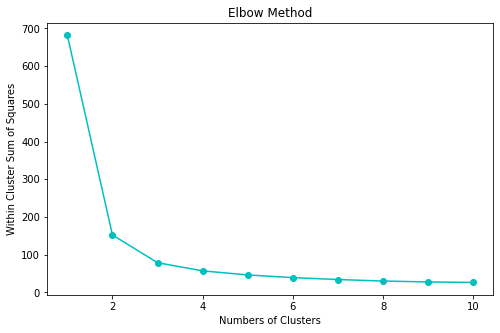

In [4]:
wcss=[] # List for saving the values of Within Cluster Sum of Squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(df) #To train the model and create classifier
    wcss.append(kmeans.inertia_) # To obtain the Within Cluster Sum of Square
    
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,'co-')
plt.xlabel("Numbers of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow Method")

Optimum number of clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Here we can see that after 3 the wcss does not decrease significantly.

Therefore we can say that the optimum number of clusters =3.

## Applying kmeans to the dataset

In [5]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
y_kmeans=kmeans.fit_predict(df)

In [6]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Here, 0,1 and 2 are the labels of species that are setosa, versicolor and virginica

## Visualising the clusters

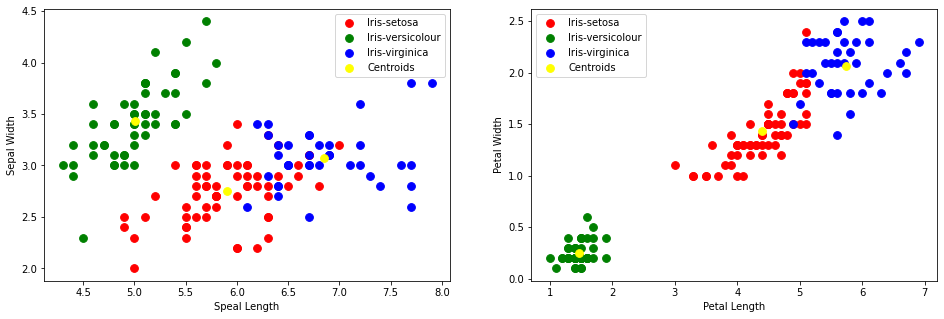

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))


axes[0].scatter(df.iloc[y_kmeans == 0, 0], df.iloc[y_kmeans == 0, 1], s = 60,  c = 'r', label = 'Iris-setosa')
axes[0].scatter(df.iloc[y_kmeans == 1, 0], df.iloc[y_kmeans == 1, 1], s = 60, c = 'g', label = 'Iris-versicolour')
axes[0].scatter(df.iloc[y_kmeans == 2, 0], df.iloc[y_kmeans == 2, 1], s = 60, c = 'b', label = 'Iris-virginica')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 60, c = 'yellow', label = 'Centroids')
axes[0].set_xlabel('Speal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].legend()

axes[1].scatter(df.iloc[y_kmeans == 0, 2], df.iloc[y_kmeans == 0, 3], s = 60,  c = 'r', label = 'Iris-setosa')
axes[1].scatter(df.iloc[y_kmeans == 1, 2], df.iloc[y_kmeans == 1, 3], s = 60, c = 'g', label = 'Iris-versicolour')
axes[1].scatter(df.iloc[y_kmeans == 2, 2], df.iloc[y_kmeans == 2, 3], s = 60, c = 'b', label = 'Iris-virginica')
axes[1].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 60, c = 'yellow', label = 'Centroids')
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')
axes[1].legend()

plt.show()

### Here, we can see three clusters of iris flower species with their centroids.